In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from geopandas import GeoDataFrame
from scipy.spatial.distance import pdist, squareform
from shapely.geometry import Point
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt


%matplotlib inline

In [2]:
no_of_neighbors = 25

dataset = pd.read_csv(
    r"F:/Geology/WSGS/Projects/jupyter/0"
    + str(no_of_neighbors)
    + "neighbors.csv",
    index_col=[0],
)


# next let's split our toy data into training and test sets, choose how much with test_size of the data becomes the test set
X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[0:, 0:-1].values,
    dataset.iloc[0:, -1].values,
    test_size=0.5,
    random_state=86,
)
tops_api = pd.read_csv(
    r"F:\Geology\WSGS\Projects\Unconformity or onlap\Python\ftunion.csv"
).fillna(
    0
)  # this file is available in the unconformity or onlap folder in the repo

iterable = ["Kfh", "Klz", "Kll", "Klr", "Kl", "Tfc", "Tfb", "Tfob", "Tfu"]
topcombos = list(zip(iterable, iterable[1:]))
topcombos.append(("Kfh", "Kl"))
topcombos.append(("Kl", "Tfu"))

In [3]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [10]:
grid_params = {
    "n_neighbors": [5,10,15,20,30,40,50,80,100],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"],
    "algorithm": ["ball_tree", 'kd_tree', 'brute'],
    "leaf_size": [10,20,30],
}

gs = GridSearchCV(
    KNeighborsClassifier(), grid_params, verbose=8, cv=10, n_jobs=6
)
gs_results = gs.fit(X_train, y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    7.6s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   13.1s
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed:   20.6s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:   30.8s
[Parallel(n_jobs=6)]: Done 209 tasks      | elapsed:   43.8s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:   54.9s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 533 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 749 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 870 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 1001 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 1140 tasks      | elapsed:  3.6min
[Paralle

In [11]:
gs_results.best_score_

0.9394444444444444

In [6]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [7]:
gs_results.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'distance'}

In [8]:
neigh = KNeighborsClassifier(**gs.best_params_)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [12]:
y_pred = neigh.predict(X_test)

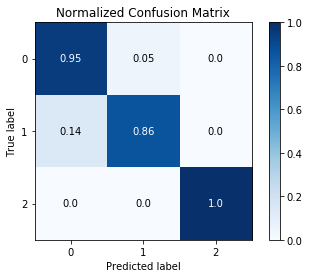

In [13]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.savefig('confusion matrix figure.pdf')